In [1]:
%pylab inline
import calin.calib.spe_fit
import calin.math.histogram
import calin.math.optimizer
import calin.math.pdf_1d

Populating the interactive namespace from numpy and matplotlib


## Load data and plot histogram

In [2]:
fernandez_data = loadtxt('../../calib/fernandez_dc_1.5kV_6.45V.dat');
mes_hist = calin.math.histogram.SimpleHist(1.0)
mes_hist.insert_vec(fernandez_data);

## Fit of single-Gaussian model

In [3]:
ped_gauss_pdf = calin.math.pdf_1d.GaussianPDF()

In [4]:
ses_g_pdf = calin.math.pdf_1d.LimitedGaussianPDF(0,numpy.inf)
mes_model_g = calin.calib.spe_fit.GeneralPoissonMES(mes_hist.xval_left(0), mes_hist.dxval(),\
        mes_hist.size(), ses_g_pdf, ped_gauss_pdf)
like_g = calin.calib.spe_fit.SPELikelihood(mes_model_g, mes_hist)
opt_g = calin.math.optimizer.NLOptOptimizer(calin.math.optimizer.LD_LBFGS, like_g)
opt_g.set_verbosity_level(calin.math.optimizer.OptimizerVerbosityLevel_MAX);
opt_g.set_abs_tolerance(0.0001);
opt_g.set_initial_values([1.0, 355.0, 10.0, 500.0, 200.0]);
opt_g.set_limits_lo([0.01, 300.0, 0.1, 100.0, 10.0])
opt_g.set_limits_hi([2.0,  400.0, 100.1, 1000.0, 500.0])
status, xopt_g, fval_g = opt_g.minimize()
print(xopt_g, fval_g)
status, err_mat_g = opt_g.calc_error_matrix()
xerr_g = sqrt(err_mat_g.diagonal())
print(xerr_g)

[   1.04990191  358.72165658   51.04687963  454.92516744  165.28480598] 72518.83149087398
[ 0.01317109  1.00096576  0.81565     3.93725818  3.97663702]


## Fit of exponential/Gaussian model

In [5]:
ses_eg_exp_pdf = calin.math.pdf_1d.LimitedExponentialPDF(0,numpy.inf,mes_hist.dxval())
ses_eg_exp_pdf.limit_scale(0.1, inf);
ses_eg_gauss_pdf = calin.math.pdf_1d.LimitedGaussianPDF(0,numpy.inf)
ses_eg_pdf = calin.math.pdf_1d.TwoComponentPDF(ses_eg_exp_pdf, "exp", ses_eg_gauss_pdf, "gauss")
mes_model_eg = calin.calib.spe_fit.GeneralPoissonMES(mes_hist.xval_left(0), mes_hist.dxval(),\
        mes_hist.size(), ses_eg_pdf, ped_gauss_pdf)
like_eg = calin.calib.spe_fit.SPELikelihood(mes_model_eg, mes_hist)
opt_eg = calin.math.optimizer.NLOptOptimizer(calin.math.optimizer.LD_LBFGS, like_eg)
#opt_eg.set_scale([0.1,0.1,1.0,0.01,1.0,1.0,0.05]);
opt_eg.set_verbosity_level(calin.math.optimizer.OptimizerVerbosityLevel_MAX);
opt_eg.set_abs_tolerance(0.0001);
opt_eg.set_max_iterations(1000);
opt_eg.set_initial_values([1.0, 355.0, 10.0, 0.1, 200.0, 500.0, 200.0]);
opt_eg.set_limits_lo([0.01, 300.0, 0.1, 0.0, 10.0, 100.0, 10.0])
opt_eg.set_limits_hi([2.0,  400.0, 100.1, 1.0, 500.0, 1000.0, 500.0])
status, xopt_eg, fval_eg = opt_eg.minimize()
print(xopt_eg, fval_eg)
status, err_mat_eg = opt_eg.calc_error_matrix()
xerr_eg = sqrt(err_mat_eg.diagonal())
print(xerr_eg)

[  1.21958383e+00   3.51232214e+02   4.64338310e+01   3.15225185e-01
   1.96041860e+02   4.92991929e+02   1.21171345e+02] 72466.89689786671
[  2.64560878e-02   1.25234505e+00   8.48860063e-01   3.37910648e-02
   3.71091135e+01   3.94204815e+00   5.33874943e+00]


In [6]:
status, err_mat_eg, eval_eg, evec_eg = opt_eg.calc_error_matrix_and_eigenvectors()
xerr_eg = sqrt(err_mat_eg.diagonal())
print(xerr_eg)
err_mat_eg = matrix(err_mat_eg)
evec_eg = matrix(evec_eg)

[  2.64560878e-02   1.25234505e+00   8.48860063e-01   3.37910648e-02
   3.71091135e+01   3.94204815e+00   5.33874943e+00]


## Fit of double-Gaussian model

Mean of one of the Gaussians is fixed at zero in the fit

In [7]:
ses_2g_g1_pdf = calin.math.pdf_1d.LimitedGaussianPDF(0,numpy.inf)
ses_2g_g2_pdf = calin.math.pdf_1d.LimitedGaussianPDF(0,numpy.inf)
ses_2g_pdf = calin.math.pdf_1d.TwoComponentPDF(ses_2g_g1_pdf, "g1", ses_2g_g2_pdf, "g2")
mes_model_2g = calin.calib.spe_fit.GeneralPoissonMES(mes_hist.xval_left(0), mes_hist.dxval(),\
        mes_hist.size(), ses_2g_pdf, ped_gauss_pdf)
like_2g = calin.calib.spe_fit.SPELikelihood(mes_model_2g, mes_hist)
freezer = calin.math.function.FreezeThawFunction(like_2g)
freezer.freeze(4,0)
opt_2g = calin.math.optimizer.NLOptOptimizer(calin.math.optimizer.LD_LBFGS, freezer)
#opt_2g.set_scale([0.1,0.1,1.0,0.01,1.0,1.0,0.05]);
opt_2g.set_verbosity_level(calin.math.optimizer.OptimizerVerbosityLevel_MAX);
opt_2g.set_abs_tolerance(0.0001);
opt_2g.set_initial_values([1.0, 355.0, 10.0, 0.1, 200.0, 500.0, 200.0]);
status, xopt_2g, fval_2g = opt_2g.minimize()
print(xopt_2g, fval_2g)

[  1.18930676e+00   3.52214093e+02   4.68817800e+01   2.55606341e-01
   1.97934671e+02   4.94651876e+02   1.22595480e+02] 72465.71922122368


In [8]:
status, err_mat_2g, eval_2g, evec_2g = opt_2g.calc_error_matrix_and_eigenvectors()
xerr_2g = sqrt(err_mat_2g.diagonal())
print(xerr_2g)
err_mat_2g = matrix(err_mat_2g)
evec_2g = matrix(evec_2g)

[  2.28576450e-02   1.23422202e+00   8.53103934e-01   3.75722307e-02
   4.83962795e+01   7.41936546e+00   5.75775697e+00]


## MCMC in Python

In [10]:
def rand_gauss(basis,sigma):
    x = basis*transpose(matrix(sigma*randn(sigma.size)))
    x = squeeze(asarray(x))
    return x

**Exponential/Gaussian**

In [37]:
x = xopt_eg
f = 1

accept = 0
g_eg_all = []
r_eg_all = []
p0_eg_all = []

mes_model_eg.set_parameter_values(xopt_eg)
ses_eg_y = asarray(mes_model_eg.n_electron_spectrum(1));
ses_eg_x = asarray(list(map(lambda i: mes_model_eg.ses_x(i), range(0,len(ses_eg_y)))))
ses_eg_norm = sum(ses_eg_y)
ses_eg_mean = sum(ses_eg_y*ses_eg_x)
ses_eg_rms = sqrt(sum(ses_eg_y*ses_eg_x*ses_eg_x) - ses_eg_mean**2)

for i in range(0,10000):
    xp = x + rand_gauss(evec_eg,sqrt(eval_eg)*0.6)
#    print(x,xp)
    val = like_eg.value(xp)
    fp = exp(fval_eg-val)
#    print(fp>f or rand(1)>fp/f,f,val,fval_eg-val,fp)
    if(fp>f or rand(1)<fp/f):
        accept += 1
        x = xp
        f = fp
        ses_eg_y = asarray(mes_model_eg.n_electron_spectrum(1));
        ses_eg_x = asarray(list(map(lambda i: mes_model_eg.ses_x(i), range(0,len(ses_eg_y)))))
        ses_eg_norm = sum(ses_eg_y)
        ses_eg_mean = sum(ses_eg_y*ses_eg_x)
        ses_eg_rms = sqrt(sum(ses_eg_y*ses_eg_x*ses_eg_x) - ses_eg_mean**2)
    if(i<100):
        next
    g_eg_all.append(ses_eg_mean)
    r_eg_all.append(ses_eg_rms/ses_eg_mean)
    p0_eg_all.append(x[0])
    
print(accept)

4293


In [33]:
print(mean(p0_eg_all), std(p0_eg_all))
print(mean(g_eg_all), std(g_eg_all))
print(mean(r_eg_all), std(r_eg_all))

1.22783924694 0.028349656664
397.685235301 7.57845439491
0.516180963542 0.015113742101


(array([   1.,    7.,   33.,   29.,   91.,  111.,   83.,   84.,  143.,
         103.,  114.,   70.,   58.,   36.,   12.,   10.,    5.,    6.,
           0.,    4.]),
 array([ 0.47706557,  0.48174627,  0.48642698,  0.49110769,  0.49578839,
         0.5004691 ,  0.5051498 ,  0.50983051,  0.51451122,  0.51919192,
         0.52387263,  0.52855333,  0.53323404,  0.53791474,  0.54259545,
         0.54727616,  0.55195686,  0.55663757,  0.56131827,  0.56599898,
         0.57067968]),
 <a list of 20 Patch objects>)

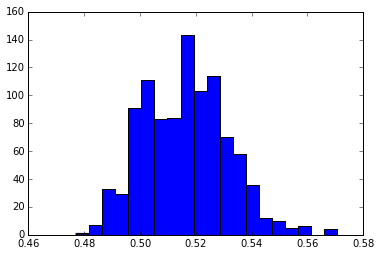

In [34]:
hist(r_eg_all,20)

**Double Gaussian**

In [13]:
ses_2g_norm = sum(ses_2g_y)
ses_2g_mean = sum(ses_2g_y*ses_2g_x)
ses_2g_rms = sqrt(sum(ses_2g_y*ses_2g_x*ses_2g_x) - ses_2g_mean**2)
print("Norm, mean, RMS: ",ses_2g_norm, ses_2g_mean, ses_2g_rms)
print("Resolution: ",ses_2g_rms/ses_2g_mean)
print("ENF: ",sqrt(1+(ses_2g_rms/ses_2g_mean)**2))

NameError: name 'ses_2g_y' is not defined